In [1]:
import pandas as pd

train = pd.read_csv(r"C:\Users\Dell\Downloads\Titanic_train.csv")
test = pd.read_csv(r"C:\Users\Dell\Downloads\Titanic_test.csv")

In [3]:
print(train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


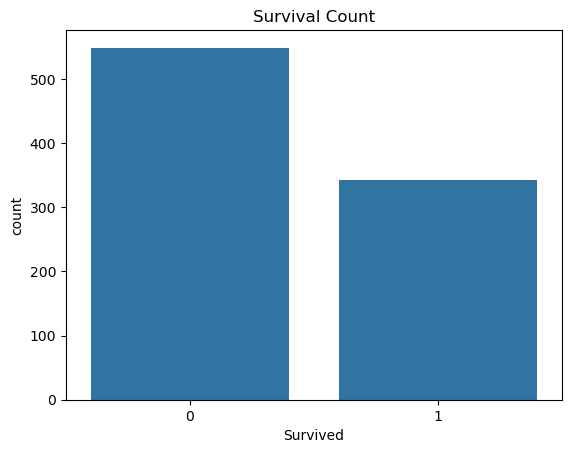

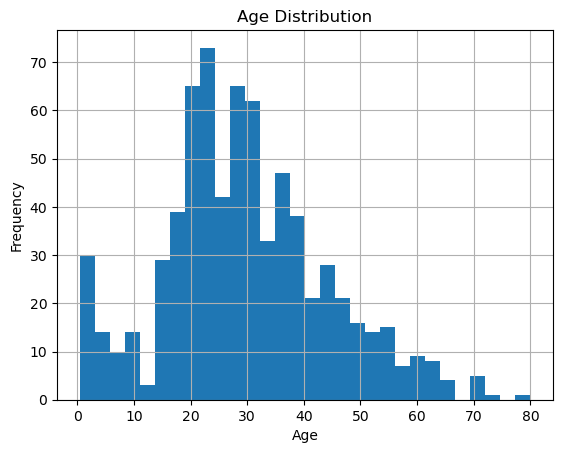

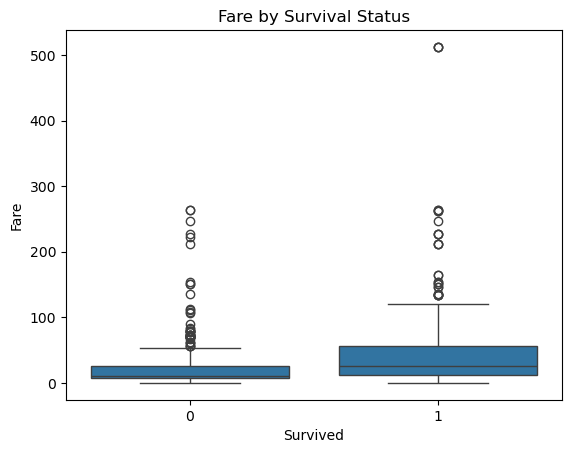

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for survival
sns.countplot(x='Survived', data=train)
plt.title('Survival Count')
plt.show()

# Histogram for Age
train['Age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box plot for Fare by Survival status
sns.boxplot(x='Survived', y='Fare', data=train)
plt.title('Fare by Survival Status')
plt.show()

In [7]:
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_19148\648336700.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_19148\648336700.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [9]:
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)
test = pd.get_dummies(test, columns=['Sex', 'Embarked'], drop_first=True)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = train.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])
y = train['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

predictions = model.predict(X_val)

accuracy = accuracy_score(y_val, predictions)
precision = precision_score(y_val, predictions)
recall = recall_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
roc_auc = roc_auc_score(y_val, predictions)

print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}, ROC AUC: {roc_auc}')

Accuracy: 0.7988826815642458, Precision: 0.7714285714285715, Recall: 0.7297297297297297, F1 Score: 0.75, ROC AUC: 0.7886743886743887


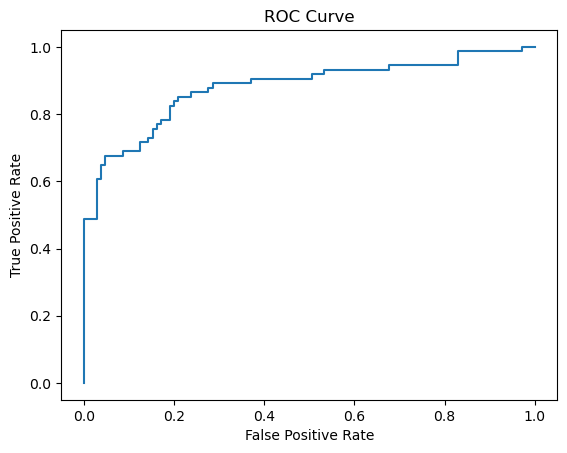

In [15]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, model.predict_proba(X_val)[:, 1])

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [1]:
import streamlit as st

st.title('Titanic Survival Prediction')

# User inputs for prediction features (e.g., Age, Sex)
age = st.number_input('Age')
sex = st.selectbox('Sex', ['male', 'female'])
fare = st.number_input('Fare')

# Prepare input data for prediction based on user input here...

if st.button('Predict'):
    # Call your prediction function here...
    st.write(f'The predicted survival probability is: {predicted_value}')

2024-12-04 16:36:21.107 
  command:

    streamlit run C:\Users\Dell\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [ ]:
1.
Difference Between Precision and Recall
Precision and recall are crucial metrics used to evaluate the performance of classification models, particularly in scenarios where class distributions are imbalanced.
Precision (also known as positive predictive value) measures the accuracy of the positive predictions made by the model. It is defined as the ratio of true positives (TP) to the total number of predicted positives (TP + false positives, FP). The formula is given by:
Precision=TP/TP+FP
Precision= TP+FP/TP
​
 
Higher precision indicates that a larger proportion of the predicted positive instances are actually relevant13.
Recall (also known as sensitivity or true positive rate) measures the model's ability to identify all relevant instances. It is defined as the ratio of true positives to the total number of actual positives (TP + false negatives, FN). The formula is:
Recall=TP/TP+FN
Recall= TP+FN/TP
​
 
High recall means that most of the relevant instances are retrieved by the model15.
In summary, precision focuses on the quality of positive predictions, while recall emphasizes the quantity of relevant instances captured. There is often a trade-off between these two metrics; improving one can lead to a decrease in the other


2.
      Cross-Validation and Its Importance in Binary Classification
Cross-validation is a statistical method used to evaluate the generalization ability of a predictive model by partitioning the data into subsets. This technique is essential in machine learning for several reasons:
Model Evaluation: Cross-validation helps assess how well a model performs on unseen data, providing a more reliable estimate of its accuracy compared to a simple train-test split48.
Overfitting Prevention: By training and validating the model on different subsets of data, cross-validation reduces the likelihood of overfitting, where a model performs well on training data but poorly on new data26.
Robustness: It provides a more comprehensive understanding of how changes in the model or data affect performance, thereby ensuring that selected models are robust and reliable before deployment46.
The most common form of cross-validation is k-fold cross-validation, where the dataset is divided into 
k
k subsets (or folds). The model is trained on 
k
−
1
k−1 folds and validated on the remaining fold, repeating this process 
k
k times. The results are then averaged to produce a final performance metric24.
In binary classification tasks, effective use of cross-validation can lead to improved model selection and better predictive performance on unseen data.